# Notes
Add Genre feature

In [1]:
import pandas as pd
import random
import numpy as np
from collections import defaultdict


In [2]:
# Load the data
ratings = pd.read_csv('ml-1m/ratings.dat', sep='::', engine='python',
                      names=['UserID', 'MovieID', 'Rating', 'Timestamp'])
movies = pd.read_csv('ml-1m/movies.dat', sep='::', engine='python',
                     names=['MovieID', 'Title', 'Genres'], encoding='latin1')
users = pd.read_csv('ml-1m/users.dat', sep='::', engine='python',
                    names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'])

# Merge the data for easier manipulation
data = pd.merge(ratings, movies, on='MovieID')
data = pd.merge(data, users, on='UserID')

# Normalize the ratings for rewards (optional)
#data['Rating'] = (data['Rating'] - 3) / 2


In [3]:
# Check the data for missing values
print(data.isnull().sum())
print(data.head())
print(data.describe())

UserID        0
MovieID       0
Rating        0
Timestamp     0
Title         0
Genres        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64
   UserID  MovieID  Rating  Timestamp                                   Title  \
0       1     1193       5  978300760  One Flew Over the Cuckoo's Nest (1975)   
1       1      661       3  978302109        James and the Giant Peach (1996)   
2       1      914       3  978301968                     My Fair Lady (1964)   
3       1     3408       4  978300275                  Erin Brockovich (2000)   
4       1     2355       5  978824291                    Bug's Life, A (1998)   

                         Genres Gender  Age  Occupation Zip-code  
0                         Drama      F    1          10    48067  
1  Animation|Children's|Musical      F    1          10    48067  
2               Musical|Romance      F    1          10    48067  
3                         Drama      F    1          10    48067  
4   A

In [4]:
print(data['Rating'].value_counts())

Rating
4    348971
3    261197
5    226310
2    107557
1     56174
Name: count, dtype: int64


In [5]:
# encode the gender column
data['Gender'] = data['Gender'].map({'F': 0, 'M': 1})

In [6]:
user_data = data.groupby('UserID').agg(
    Rated_movies=('MovieID', lambda x: list(x)),
    Ratings=('Rating', lambda x: list(x)),
    Genres=('Genres', lambda x: list(x)),
    Gender=('Gender', lambda x: x.iloc[0]),
    Age=('Age', lambda x: x.iloc[0]),
    Occupation=('Occupation', lambda x: x.iloc[0]),
    Zip_code=('Zip-code', lambda x: x.iloc[0]),
    Timestamp=('Timestamp', lambda x: list(x))
).reset_index()
print(user_data.head())


   UserID                                       Rated_movies  \
0       1  [1193, 661, 914, 3408, 2355, 1197, 1287, 2804,...   
1       2  [1193, 3105, 2321, 1962, 1207, 2028, 1246, 135...   
2       3  [2355, 1197, 1270, 1961, 260, 3114, 648, 1210,...   
3       4  [1097, 2692, 260, 2028, 3468, 1210, 480, 1196,...   
4       5  [3408, 2355, 919, 3105, 1721, 2762, 150, 2692,...   

                                             Ratings  \
0  [5, 3, 3, 4, 5, 3, 5, 5, 4, 4, 5, 4, 4, 4, 5, ...   
1  [5, 4, 3, 5, 4, 4, 5, 5, 4, 4, 3, 4, 4, 5, 3, ...   
2  [5, 5, 3, 4, 5, 3, 3, 4, 5, 4, 4, 2, 4, 4, 5, ...   
3  [4, 5, 5, 5, 5, 3, 4, 2, 5, 5, 4, 4, 4, 4, 4, ...   
4  [3, 5, 4, 2, 1, 3, 2, 4, 2, 4, 2, 1, 5, 2, 4, ...   

                                              Genres  Gender  Age  Occupation  \
0  [Drama, Animation|Children's|Musical, Musical|...       0    1          10   
1  [Drama, Drama, Comedy, Drama, Drama, Action|Dr...       1   56          16   
2  [Animation|Children's|Comedy, Ac

In [7]:
# Define a function to sort each user's data by timestamp
def sort_by_timestamp(row):
    sorted_indices = sorted(range(len(row['Timestamp'])), key=lambda i: row['Timestamp'][i])
    row['Rated_movies'] = [row['Rated_movies'][i] for i in sorted_indices]
    row['Ratings'] = [row['Ratings'][i] for i in sorted_indices]
    row['Genres'] = [row['Genres'][i] for i in sorted_indices]
    row['Timestamp'] = [row['Timestamp'][i] for i in sorted_indices]
    return row

# Apply the sorting function to the user_data DataFrame
user_data = user_data.apply(sort_by_timestamp, axis=1)

print(user_data.head())

   UserID                                       Rated_movies  \
0       1  [3186, 1270, 1721, 1022, 2340, 1836, 3408, 280...   
1       2  [1198, 1210, 1217, 2717, 1293, 2943, 1225, 119...   
2       3  [593, 2858, 1968, 3534, 1961, 1431, 1266, 1378...   
3       4  [1210, 1097, 3468, 480, 3527, 260, 1196, 1198,...   
4       5  [919, 2717, 908, 356, 1250, 2858, 1127, 2188, ...   

                                             Ratings  \
0  [4, 5, 4, 5, 3, 5, 4, 5, 4, 5, 3, 4, 4, 4, 4, ...   
1  [4, 4, 3, 3, 5, 4, 5, 5, 5, 4, 4, 2, 5, 4, 5, ...   
2  [3, 4, 4, 3, 4, 3, 5, 5, 4, 5, 4, 5, 4, 4, 5, ...   
3  [3, 4, 5, 4, 1, 5, 2, 5, 5, 5, 5, 4, 5, 5, 4, ...   
4  [4, 1, 4, 1, 5, 4, 1, 1, 3, 2, 5, 5, 4, 4, 3, ...   

                                              Genres  Gender  Age  Occupation  \
0  [Drama, Comedy|Sci-Fi, Drama|Romance, Animatio...       0    1          10   
1  [Action|Adventure, Action|Adventure|Romance|Sc...       1   56          16   
2  [Drama|Thriller, Comedy|Drama, C

In [8]:
# Filter out users who have rated less than 100 movies
user_data = user_data[user_data['Rated_movies'].apply(len) >= 100]

In [9]:
print(user_data['Rated_movies'].apply(len).describe())

count    2945.000000
mean      287.708659
std       215.815905
min       100.000000
25%       141.000000
50%       212.000000
75%       355.000000
max      2314.000000
Name: Rated_movies, dtype: float64


In [10]:
# Make zip codes numerical
user_data['Zip_code'] = user_data['Zip_code'].apply(lambda x: int(str(x).split('-')[0]))


In [11]:
print(user_data['Rated_movies'].apply(len).describe())

count    2945.000000
mean      287.708659
std       215.815905
min       100.000000
25%       141.000000
50%       212.000000
75%       355.000000
max      2314.000000
Name: Rated_movies, dtype: float64


In [12]:
# Format the Zip_code column to the first three digits as integers
user_data['Zip_code'] = user_data['Zip_code'].apply(lambda x: int(str(x)[0:3])) # first three digits

# Convert the Rated_movies and Ratings columns to lists of integers
user_data['Rated_movies'] = user_data['Rated_movies'].apply(lambda x: list(map(int, x)))
user_data['Ratings'] = user_data['Ratings'].apply(lambda x: list(map(int, x)))

# Verify the changes
print(user_data.head())

   UserID                                       Rated_movies  \
1       2  [1198, 1210, 1217, 2717, 1293, 2943, 1225, 119...   
4       5  [919, 2717, 908, 356, 1250, 2858, 1127, 2188, ...   
7       8  [1210, 111, 908, 3481, 480, 1573, 2692, 2028, ...   
8       9  [1961, 3751, 912, 1210, 1221, 3178, 3916, 3948...   
9      10  [597, 743, 858, 1210, 1948, 2312, 551, 3751, 1...   

                                             Ratings  \
1  [4, 4, 3, 3, 5, 4, 5, 5, 5, 4, 4, 2, 5, 4, 5, ...   
4  [4, 1, 4, 1, 5, 4, 1, 1, 3, 2, 5, 5, 4, 4, 3, ...   
7  [4, 5, 5, 4, 5, 4, 5, 5, 5, 3, 2, 5, 5, 5, 5, ...   
8  [5, 4, 4, 4, 4, 3, 3, 3, 5, 3, 4, 5, 4, 4, 4, ...   
9  [4, 3, 3, 4, 4, 5, 3, 5, 5, 3, 3, 4, 4, 5, 4, ...   

                                              Genres  Gender  Age  Occupation  \
1  [Action|Adventure, Action|Adventure|Romance|Sc...       1   56          16   
4  [Adventure|Children's|Drama|Musical, Comedy|Ho...       1   25          20   
7  [Action|Adventure|Romance|Sci-Fi

In [13]:
print(user_data['Rated_movies'].apply(len).describe())

count    2945.000000
mean      287.708659
std       215.815905
min       100.000000
25%       141.000000
50%       212.000000
75%       355.000000
max      2314.000000
Name: Rated_movies, dtype: float64


In [14]:
from sklearn.preprocessing import MultiLabelBinarizer

In [15]:
# Step 1: Split genres per movie on "|"
user_data['Genres'] = user_data['Genres'].apply(
    lambda x: [[subgenre for subgenre in genre.split('|')] for genre in x] if isinstance(x, list) else []
)

# Step 2: Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Flatten and fit genres across all movies
all_genres = [subgenre for movie in user_data['Genres'] for subgenre in movie]
mlb.fit(all_genres)

# Save decoding list for later use
genre_decoding_list = mlb.classes_.tolist()

# Step 3: One-hot encode genres for each movie
user_data['Encoded_Genres'] = user_data['Genres'].apply(
    lambda x: [mlb.transform([movie])[0].tolist() for movie in x] if isinstance(x, list) else []
)

# Optional: Drop the original Genres column if not needed
user_data = user_data.drop(columns=['Genres'])

# Verify the result
print(user_data.head())
print("Decoding list:", genre_decoding_list)


   UserID                                       Rated_movies  \
1       2  [1198, 1210, 1217, 2717, 1293, 2943, 1225, 119...   
4       5  [919, 2717, 908, 356, 1250, 2858, 1127, 2188, ...   
7       8  [1210, 111, 908, 3481, 480, 1573, 2692, 2028, ...   
8       9  [1961, 3751, 912, 1210, 1221, 3178, 3916, 3948...   
9      10  [597, 743, 858, 1210, 1948, 2312, 551, 3751, 1...   

                                             Ratings  Gender  Age  Occupation  \
1  [4, 4, 3, 3, 5, 4, 5, 5, 5, 4, 4, 2, 5, 4, 5, ...       1   56          16   
4  [4, 1, 4, 1, 5, 4, 1, 1, 3, 2, 5, 5, 4, 4, 3, ...       1   25          20   
7  [4, 5, 5, 4, 5, 4, 5, 5, 5, 3, 2, 5, 5, 5, 5, ...       1   25          12   
8  [5, 4, 4, 4, 4, 3, 3, 3, 5, 3, 4, 5, 4, 4, 4, ...       1   25          17   
9  [4, 3, 3, 4, 4, 5, 3, 5, 5, 3, 3, 4, 4, 5, 4, ...       0   35           1   

   Zip_code                                          Timestamp  \
1       700  [978298124, 978298151, 978298151, 978298196, 9...

In [16]:
user_data.shape

(2945, 9)

In [17]:
# Find the maximum number of movies rated by a user
max_len = max(user_data['Rated_movies'].apply(len))
print(max_len)

2314


In [18]:
# Normalize the ratings for rewards (optional)
Normalized_Ratings = []

for rating in user_data['Ratings']:
    minrating = np.min(rating)
    maxrating = np.max(rating)
    rating = [(r - minrating) / (maxrating - minrating) for r in rating]
    Normalized_Ratings.append(rating)


user_data['Ratings'] = Normalized_Ratings
                        

In [19]:
print(user_data.head())

   UserID                                       Rated_movies  \
1       2  [1198, 1210, 1217, 2717, 1293, 2943, 1225, 119...   
4       5  [919, 2717, 908, 356, 1250, 2858, 1127, 2188, ...   
7       8  [1210, 111, 908, 3481, 480, 1573, 2692, 2028, ...   
8       9  [1961, 3751, 912, 1210, 1221, 3178, 3916, 3948...   
9      10  [597, 743, 858, 1210, 1948, 2312, 551, 3751, 1...   

                                             Ratings  Gender  Age  Occupation  \
1  [0.75, 0.75, 0.5, 0.5, 1.0, 0.75, 1.0, 1.0, 1....       1   56          16   
4  [0.75, 0.0, 0.75, 0.0, 1.0, 0.75, 0.0, 0.0, 0....       1   25          20   
7  [0.6666666666666666, 1.0, 1.0, 0.6666666666666...       1   25          12   
8  [1.0, 0.6666666666666666, 0.6666666666666666, ...       1   25          17   
9  [0.6666666666666666, 0.3333333333333333, 0.333...       0   35           1   

   Zip_code                                          Timestamp  \
1       700  [978298124, 978298151, 978298151, 978298196, 9...

In [20]:
import gym
from gym import spaces

In [21]:
class MovieLensEnv(gym.Env):
    def __init__(self, data, user_data):
        super(MovieLensEnv, self).__init__()
        
        # Extract unique users and movies
        self.users = data['UserID'].unique()
        self.movies = data['MovieID'].unique()
        self.data = data
        
        self.user_data = user_data
        self.total_movies = len(self.movies)
        self.total_users = len(self.users)
        
        # Initialize state
        self.reset()

    def reset(self):
        # Ensure all users have enough rated movies, at least 80
        self.user_data = self.user_data[self.user_data['Rated_movies'].apply(len) >= 80]
        
        if self.user_data.empty:
            raise ValueError("No users with sufficient rated movies remaining in user_data.")
        
        # Randomly pick a user
        self.current_user = np.random.choice(self.user_data['UserID'].unique())
        
        # Get the user's history
        user_history = self.user_data[self.user_data['UserID'] == self.current_user]
        
        self.userAttributes = user_history[['Gender', 'Age', 'Occupation', 'Zip_code']].iloc[0]
        
        # Remove user from user_data so that the agent doesn't learn the same user again
        self.user_data = self.user_data[self.user_data['UserID'] != self.current_user]
        
        # Get all the user's rated movies and ratings
        all_movies = user_history['Rated_movies'].iloc[0]
        all_ratings = user_history['Ratings'].iloc[0]
        all_genres = user_history['Encoded_Genres'].iloc[0]
        
        # Randomly pick 25 ranked movies and 50 unranked movies
        self.ranked_movies = []
        self.rating_history = []
        self.ranked_movie_genres = []
        for i in range(25):
            total_movies = len(all_movies) - 1
            idx = np.random.choice(range(total_movies))
            self.ranked_movies.append(all_movies[idx])
            self.rating_history.append(all_ratings[idx])
            self.ranked_movie_genres.append(all_genres[idx])
            all_movies.pop(idx)
            all_ratings.pop(idx)
            all_genres.pop(idx)
        
        self.unranked_movies = []
        self.unranked_movie_ratings = []
        self.unranked_movie_genres = []
        
        for i in range(50):
            total_movies = len(all_movies) - 1
            
            if total_movies == 0:
                print(f"User has rated less than 75 movies. User ID: {self.current_user}, Total Users remaining: {len(self.user_data)}")
            idx = np.random.choice(range(total_movies))
            self.unranked_movies.append(all_movies[idx])
            self.unranked_movie_ratings.append(all_ratings[idx])
            self.unranked_movie_genres.append(all_genres[idx])
            all_movies.pop(idx)
            all_ratings.pop(idx)
            all_genres.pop(idx)
        
        self.steps = 0
    
        return self.current_user, self.ranked_movies, self.rating_history, self.ranked_movie_genres, self.unranked_movies, self.unranked_movie_genres

    def step(self, action):
        # Map action index to MovieID
        recommended_movie = self.unranked_movies[action]
        
        # Get the rating of the recommended movie
        reward = self.unranked_movie_ratings[action]
        
        # Update the state
        self.ranked_movies.append(recommended_movie)
        self.rating_history.append(reward)
        self.ranked_movie_genres.append(self.unranked_movie_genres[action])
        
        # Remove the recommended movie from the unranked movies
        self.unranked_movie_genres.pop(action)
        self.unranked_movie_ratings.pop(action)
        self.unranked_movies.pop(action)
        
        # Check if the episode is done
        done = len(self.unranked_movies) == 0
        
        # Convert ranked movies and ratings to numeric
        ranked_movies_numeric = [int(movie) for movie in self.ranked_movies]
        rating_history_numeric = [float(rating) for rating in self.rating_history]


        # Combine with user attributes
        user_attributes = list(map(float, self.userAttributes))
    
        # Flatten ranked_genres
        flat_ranked_genres = [genre for movie_genres in self.ranked_movie_genres[-25:] for genre in movie_genres]

        # Construct initial state
        state = (ranked_movies_numeric[-25:] + rating_history_numeric[-25:] + flat_ranked_genres + user_attributes + [1])  # 1 for bias term

        if self.steps == 30: # 20th step
            done = True
                
        self.steps += 1
            
        return state, reward, done, {}

    def render(self, mode='human'):
        print(f"Current User: {self.current_user}")
        print(f"User Attributes: {self.userAttributes}")
        print(f"Ranked Movies: {len(self.ranked_movies)}")
        print(f"Rating History: {self.rating_history}")
        print(f"Unranked Movies Left: {len(self.unranked_movies)}")


In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [23]:
class DuelingDQN(nn.Module):
    def __init__(self, state_dim, action_dim):
        """
        Dueling DQN Network
        Args:
            state_dim (int): Dimension of the state space
            action_dim (int): Dimension of the action space
        """
        super(DuelingDQN, self).__init__()
        # Shared network
        self.fc1 = nn.Linear(state_dim, 128) # Input layer
        self.fc2 = nn.Linear(128, 128) # Hidden layer

        # Value stream
        self.value_fc = nn.Linear(128, 64) # Hidden layer
        self.value_out = nn.Linear(64, 1) # Output layer

        # Advantage stream
        self.advantage_fc = nn.Linear(128, 64) # Hidden layer
        self.advantage_out = nn.Linear(64, action_dim) # Output layer

    def forward(self, state):
        """
        Forward pass of the network
        Args:
            state (torch.Tensor): State input
        Returns:
            torch.Tensor: Q-values for each action
        """
        # Shared layers
        x = F.relu(self.fc1(state))
        x = F.relu(self.fc2(x))

        # Value stream
        value = F.relu(self.value_fc(x))
        value = self.value_out(value)

        # Advantage stream
        advantage = F.relu(self.advantage_fc(x))
        advantage = self.advantage_out(advantage)

        # Combine value and advantage streams
        q_values = value + (advantage - advantage.mean(dim=1, keepdim=True))
        return q_values


In [24]:
class ReplayBuffer:
    def __init__(self, max_size, state_dim):
        """
        Replay Buffer to store environment transitions.
        Args:
            max_size (int): Maximum number of transitions to store.
            state_dim (int): Dimension of the state space.
        """
        self.max_size = max_size
        self.state_dim = state_dim
        self.buffer = []
        self.position = 0

    def add(self, state, action, reward, next_state, done):
        """
        Add a new transition to the buffer.
        Args:
            state (numpy.ndarray): Current state.
            action (int): Action taken.
            reward (float): Reward received.
            next_state (numpy.ndarray): Next state.
            done (bool): Whether the episode is done.
        """
        # Pad state and next_state to ensure fixed dimensions
        padded_state = np.pad(state, (0, self.state_dim - len(state)), constant_values=0)
        padded_next_state = np.pad(next_state, (0, self.state_dim - len(next_state)), constant_values=0)

        transition = (padded_state, action, reward, padded_next_state, done)

        if len(self.buffer) < self.max_size:
            self.buffer.append(transition)
        else:
            self.buffer[self.position] = transition

        self.position = (self.position + 1) % self.max_size

    def sample(self, batch_size):
        """
        Sample a batch of transitions from the buffer.
        Args:
            batch_size (int): Number of transitions to sample.
        Returns:
            tuple: Batches of (states, actions, rewards, next_states, dones).
        """
        batch = random.sample(self.buffer, batch_size)
        states, actions, rewards, next_states, dones = zip(*batch)
        return (
            np.array(states, dtype=np.float32),
            np.array(actions, dtype=np.int64),
            np.array(rewards, dtype=np.float32),
            np.array(next_states, dtype=np.float32),
            np.array(dones, dtype=np.float32)
        )

    def size(self):
        """
        Get the current size of the buffer.
        Returns:
            int: Number of stored transitions.
        """
        return len(self.buffer)


In [25]:
env = MovieLensEnv(data, user_data)

In [26]:
state_dim = 25 + 25 + 450 + 4 + 1 # 25 ranked movies, 25 ratings, 25 genres one hot encoded, 4 user attributes, 1 bias term
action_dim = 50  # 50 unranked movies

replay_buffer = ReplayBuffer(max_size=100000, state_dim=state_dim)

# Hyperparameters
learning_rate = 0.00005
epsilon = 0.1
batch_actions = 30
batch_size = 64
gamma = 0.9

num_episodes = 1000

# Parameters for epsilon decay
epsilon_start = 0.9   # Initial epsilon
epsilon_end = 0.1     # Minimum epsilon
exploration_episodes = .8 * num_episodes  # Total number of episodes to explore


dueling_dqn = DuelingDQN(state_dim, action_dim)
target_dqn = DuelingDQN(state_dim, action_dim)

# Initialize networks
dueling_dqn = DuelingDQN(state_dim, action_dim)
target_dqn = DuelingDQN(state_dim, action_dim)
target_dqn.load_state_dict(dueling_dqn.state_dict())  # Sync target network
target_dqn.eval()

optimizer = optim.Adam(dueling_dqn.parameters(), lr=learning_rate)



cumulative_rewards = []
for episode in range(num_episodes): 
    # Compute epsilon for this episode
    if episode < exploration_episodes:
        epsilon = max(epsilon_end, epsilon_start - (epsilon_start - epsilon_end) * (episode / exploration_episodes))
    else:
        epsilon = 0  # Pure exploitation for the last 20% of episodes
    
    # Reset environment
    current_user, ranked_movies, rating_history, ranked_genres, unranked_movies, unranked_genres = env.reset()

    # Convert ranked movies and ratings to numeric
    ranked_movies_numeric = [int(movie) for movie in ranked_movies]
    rating_history_numeric = [float(rating) for rating in rating_history]

    # Combine with user attributes
    user_attributes = list(map(float, env.userAttributes))
    
    # Flatten ranked_genres
    flat_ranked_genres = [genre for movie_genres in ranked_genres for genre in movie_genres]

    # Construct initial state
    state = (ranked_movies_numeric + rating_history_numeric + flat_ranked_genres + user_attributes + [1])  # 1 for bias term
    
    cumulative_reward = 0

    done = False
    while not done:
        # Forward pass
        # Directly convert state to a tensor without padding
        state_tensor = torch.tensor(state, dtype=torch.float32).unsqueeze(0)
        q_values = dueling_dqn(state_tensor)
        valid_actions = len(env.unranked_movies)  # Current valid action range
        if random.random() < epsilon:
            action = random.randint(0, valid_actions - 1)  # Random valid action
        else:
            q_values = dueling_dqn(state_tensor)
            masked_q_values = q_values[:, :valid_actions]  # Mask invalid actions
            action = torch.argmax(masked_q_values).item()

        # Take action
        next_state, reward, done, _ = env.step(action)

        # Store transition
        replay_buffer.add(state, action, reward, next_state, done)

        # Sample batch and train
        if replay_buffer.size() >= batch_size:
            batch_states, batch_actions, batch_rewards, batch_next_states, batch_dones = replay_buffer.sample(batch_size)

            batch_states = torch.tensor(batch_states, dtype=torch.float32)
            batch_actions = torch.tensor(batch_actions, dtype=torch.int64).unsqueeze(1)
            batch_rewards = torch.tensor(batch_rewards, dtype=torch.float32).unsqueeze(1)
            batch_next_states = torch.tensor(batch_next_states, dtype=torch.float32)
            batch_dones = torch.tensor(batch_dones, dtype=torch.float32).unsqueeze(1)

            # Compute targets and optimize network
            with torch.no_grad():
                target_q_values = batch_rewards + gamma * (1 - batch_dones) * target_dqn(batch_next_states).max(dim=1, keepdim=True)[0]
            q_values = dueling_dqn(batch_states).gather(1, batch_actions)
            loss = torch.nn.functional.mse_loss(q_values, target_q_values)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        state = next_state
        cumulative_reward += reward
        
    # Update target network
    if episode % 10 == 0:
        target_dqn.load_state_dict(dueling_dqn.state_dict())
        
    
    cumulative_rewards.append(cumulative_reward)

In [27]:
import matplotlib.pyplot as plt

In [28]:
# Moving Average Function
def moving_average(data, *, window_size=50):
    """Smooths 1-D data array using a moving average."""
    assert data.ndim == 1
    kernel = np.ones(window_size)
    smooth_data = np.convolve(data, kernel, mode="same") / window_size
    return smooth_data

In [29]:
# Apply Moving Average
cumulative_rewards = np.array(cumulative_rewards)
smoothed_rewards = moving_average(cumulative_rewards, window_size=50)

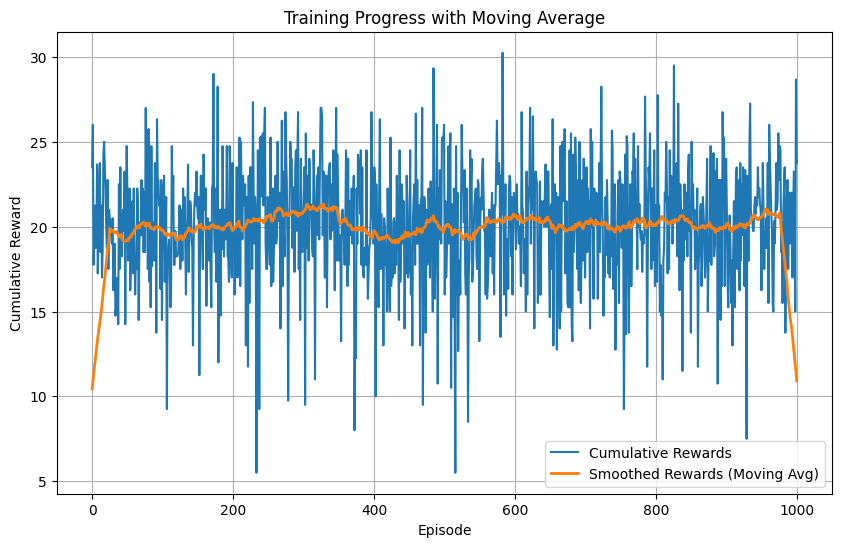

In [30]:
# Plot Results
plt.figure(figsize=(10, 6))
plt.plot(cumulative_rewards, label="Cumulative Rewards")
plt.plot(smoothed_rewards, label="Smoothed Rewards (Moving Avg)", linewidth=2)
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.title("Training Progress with Moving Average")
plt.legend()
plt.grid()
plt.show()

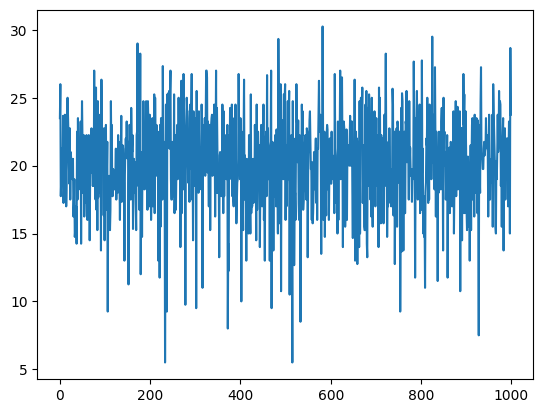

In [31]:
# Plot cumulative rewards over episodes
plt.plot(cumulative_rewards)